In [4]:
pip install -q tensorflow-gpu==2.19.0

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import seaborn as sns
import pandas as pd

In [8]:
tf .__version__

'2.19.0'

In [9]:
%load_ext tensorboard

In [10]:
logdir='log'

In [13]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape images to add a channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
          y=train_labels,
          epochs=5,
          validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 27ms/step - accuracy: 0.8957 - loss: 0.3338 - val_accuracy: 0.9845 - val_loss: 0.0456
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9839 - loss: 0.0500 - val_accuracy: 0.9890 - val_loss: 0.0332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy: 0.9910 - val_loss: 0.0276
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9926 - val_loss: 0.0268
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9909 - val_loss: 0.0291


In [33]:
y_true=test_labels
y_pred=np.argmax(model.predict(test_images), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [34]:
classes=[0,1,2,3,4,5,6,7,8,9]

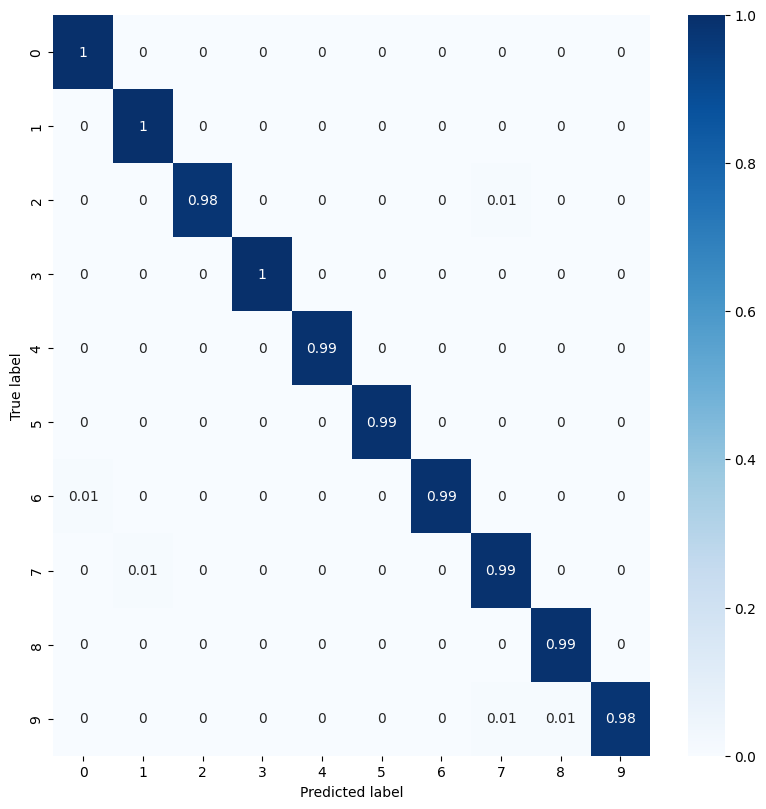

In [39]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
con_mat_norm = np.around(con_mat.numpy().astype('float') / con_mat.numpy().sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index=classes,
                          columns=classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
# Calculate True Positives (VP), False Positives (FP), False Negatives (FN), and True Negatives (VN) for each class
VP = np.diag(con_mat.numpy())
FP = np.sum(con_mat.numpy(), axis=0) - VP
FN = np.sum(con_mat.numpy(), axis=1) - VP
N = np.sum(con_mat.numpy())
VN = N - (VP + FP + FN)

# Acurácia: (VP+VN) / N
accuracy = (VP + VN) / N
print("Acurácia para cada classe:", accuracy)
print("Acurácia geral:", np.mean(accuracy))


# Sensibilidade (Recall): VP / (VP+FN)
# To avoid division by zero, handle the case where VP + FN is zero
recall = np.where((VP + FN) != 0, VP / (VP + FN), 0)
print("Sensibilidade (Recall) para cada classe:", recall)
print("Sensibilidade (Recall) média:", np.mean(recall))


# Especificidade: VN / (FP+VN)
# To avoid division by zero, handle the case where FP + VN is zero
specificity = np.where((FP + VN) != 0, VN / (FP + VN), 0)
print("Especificidade para cada classe:", specificity)
print("Especificidade média:", np.mean(specificity))

# Precisão: VP / (VP+FP)
# To avoid division by zero, handle the case where VP + FP is zero
precision = np.where((VP + FP) != 0, VP / (VP + FP), 0)
print("Precisão para cada classe:", precision)
print("Precisão média:", np.mean(precision))

# F-score : 2 x (PxS) / (P+S)
# To avoid division by zero, handle the case where precision + recall is zero
f_score = np.where((precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0)
print("F-score para cada classe:", f_score)
print("F-score média:", np.mean(f_score))

Acurácia para cada classe: [0.9984 0.9982 0.9978 0.9988 0.9989 0.9984 0.9978 0.9976 0.9982 0.9977]
Acurácia geral: 0.99818
Sensibilidade (Recall) para cada classe: [0.99591837 0.99823789 0.98158915 0.9970297  0.99185336 0.98878924
 0.98851775 0.9922179  0.99178645 0.98216056]
Sensibilidade (Recall) média: 0.9908100348002531
Especificidade para cada classe: [0.99866962 0.99819515 0.99966548 0.99899889 0.99966733 0.99934124
 0.99878345 0.99821667 0.99889209 0.99944389]
Especificidade média: 0.9989873814840757
Precisão para cada classe: [0.98785425 0.98607485 0.99704724 0.99114173 0.99692938 0.99324324
 0.98851775 0.98455598 0.9897541  0.99497992]
Precisão média: 0.991009844186477
F-score para cada classe: [0.99186992 0.99211909 0.98925781 0.994077   0.99438489 0.99101124
 0.98851775 0.98837209 0.99076923 0.98852868]
F-score média: 0.9908907693133633
